# Combining sales with items and holidays

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load CSV file into a DataFrame
df_sales = pd.read_csv('Processed/data_clean.csv')
df_items = pd.read_csv('Processed/items_clean.csv')
df_stores = pd.read_csv('Processed/stores_clean.csv')
df_holidays = pd.read_csv('Processed/holidays_events(india)_clean.csv')

month_mapping = {
    'jan': 'Jan',
    'feb': 'Feb',
    'mrt': 'Mar',  # Custom mapping for 'mrt'
    'apr': 'Apr',
    'mei': 'May',
    'jun': 'Jun',
    'jul': 'Jul',
    'aug': 'Aug',
    'sep': 'Sep',
    'okt': 'Oct',
    'nov': 'Nov',
    'dec': 'Dec'
}

# Columns of interest
df_sales = df_sales[['id','date', 'store_nbr',  'item_nbr', 'unit_sales',  'onpromotion']]
df_items = df_items[['item_nbr', 'class', 'family', 'perishable', 'Price']]


# MERGE items
df = pd.merge(df_sales, df_items, on='item_nbr')

# Add total sales
df['total_sales'] = df['unit_sales'] * df['Price']

#ADD WEEKDAY
df['date'] = pd.to_datetime(df['date']).dt.date
df['weekday'] = df['date'].apply(lambda x: x.weekday())

df_holidays = pd.read_csv('Processed/holidays_events(india)_clean.csv')
df_holidays['date'] = pd.to_datetime(df_holidays['date'].str.lower().replace(month_mapping, regex=True), format='%Y-%b-%d')
df_holidays['date'] = df_holidays['date'].dt.date

df = pd.merge(df, df_holidays, on='date', how='left')

df.to_csv('Processed/salesbyday_clean.csv', index=False)

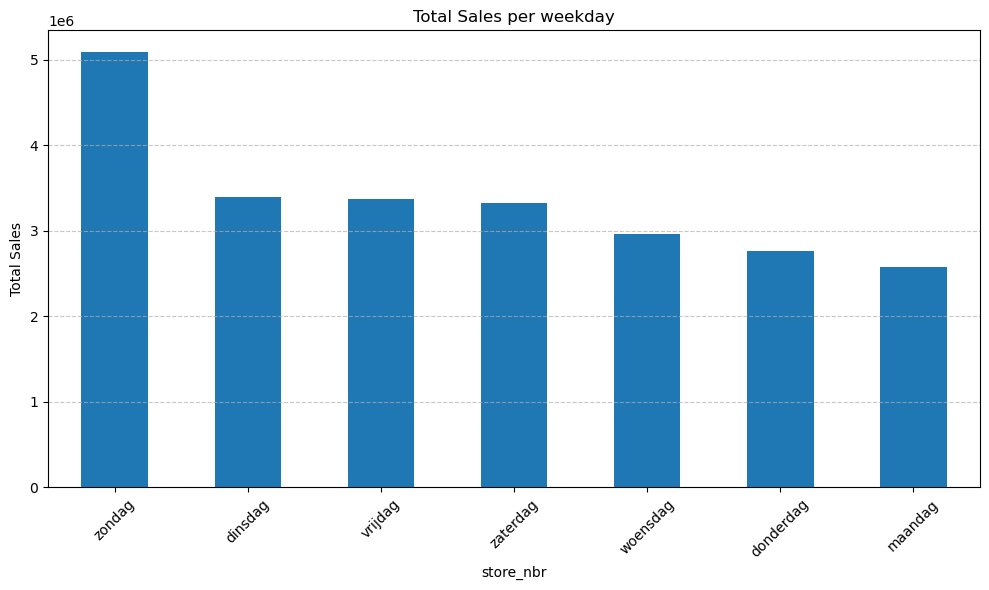

In [4]:
df = pd.read_csv('Processed/salesbyday_clean.csv')

total_sales_per_weekday = df.groupby('type')['total_sales'].sum()
total_sales_per_weekday = total_sales_per_weekday.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
total_sales_per_weekday.plot(kind='bar')
plt.title('Total Sales per weekday')
plt.xlabel('store_nbr')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()
plt.show()

# Sales holiday


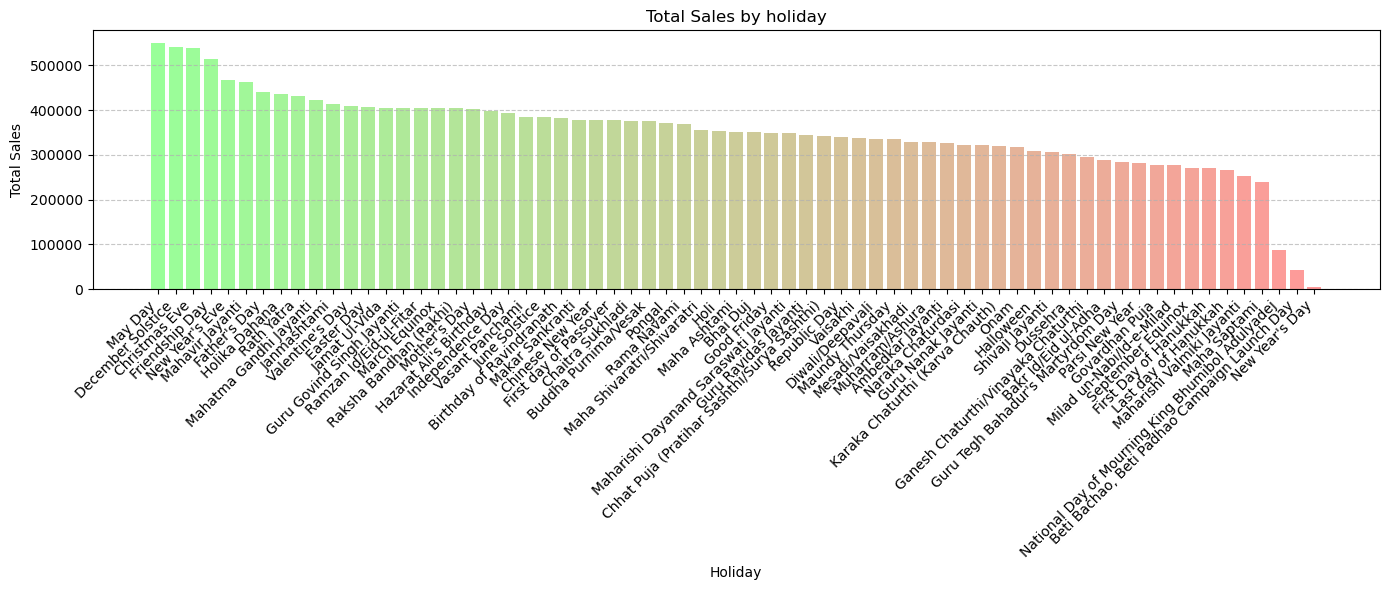

In [7]:
import matplotlib.pyplot as plt
import numpy as np

total_sales_per_holiday = df.groupby('description')['total_sales'].sum()
total_sales_per_holiday = total_sales_per_holiday.sort_values(ascending=False)

# Assuming total_sales_per_holiday is already calculated as described in the question
# Generate a colormap ranging from green to red based on bar index
num_bars = len(total_sales_per_holiday)
pastel_red = (1, 0.6, 0.6)  # RGB values for pastel red
pastel_green = (0.6, 1, 0.6)  # RGB values for pastel green
colors = np.linspace(pastel_green, pastel_red, num_bars)

# Plot the bar chart with the generated colormap
plt.figure(figsize=(14, 6))
bars = plt.bar(total_sales_per_holiday.index, total_sales_per_holiday.values, color=colors)

plt.title('Total Sales by holiday')
plt.xlabel('Holiday')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()
plt.show()


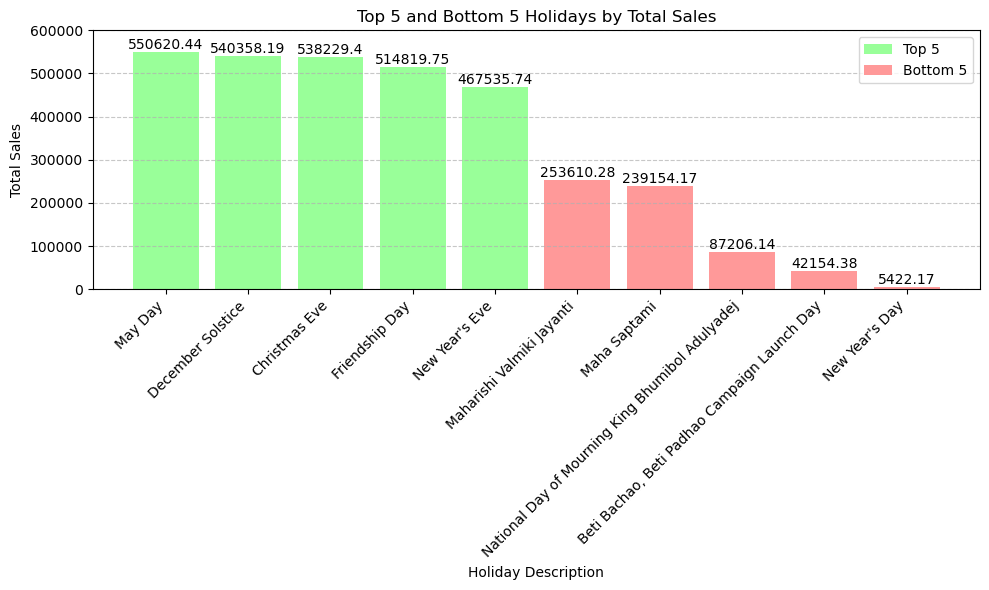

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming total_sales_per_holiday is already calculated as described in the question
# Get the top 5 and bottom 5 holidays
top_5 = total_sales_per_holiday.head(5)
bottom_5 = total_sales_per_holiday.tail(5)

# Concatenate top 5 and bottom 5 Series into a DataFrame
top_bottom_5 = pd.concat([top_5, bottom_5])

# Plot top 5 and bottom 5 in one bar chart with different colors
plt.figure(figsize=(10, 6))

# Plot top 5 in blue
bars_top = plt.bar(top_5.index, top_5.values, color=pastel_green, label='Top 5')

# Plot bottom 5 in red
bars_bottom = plt.bar(bottom_5.index, bottom_5.values, color=pastel_red, label='Bottom 5')

#plt.bar(top_5.index, top_5.values, color=pastel_green, label='Top 5')

# Plot bottom 5 in red
#plt.bar(bottom_5.index, bottom_5.values, color=pastel_red, label='Bottom 5')

plt.title('Top 5 and Bottom 5 Holidays by Total Sales')
plt.xlabel('Holiday Description')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines

for bar in bars_top:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

for bar in bars_bottom:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.ylim(0, 600000)

plt.tight_layout()
plt.show()


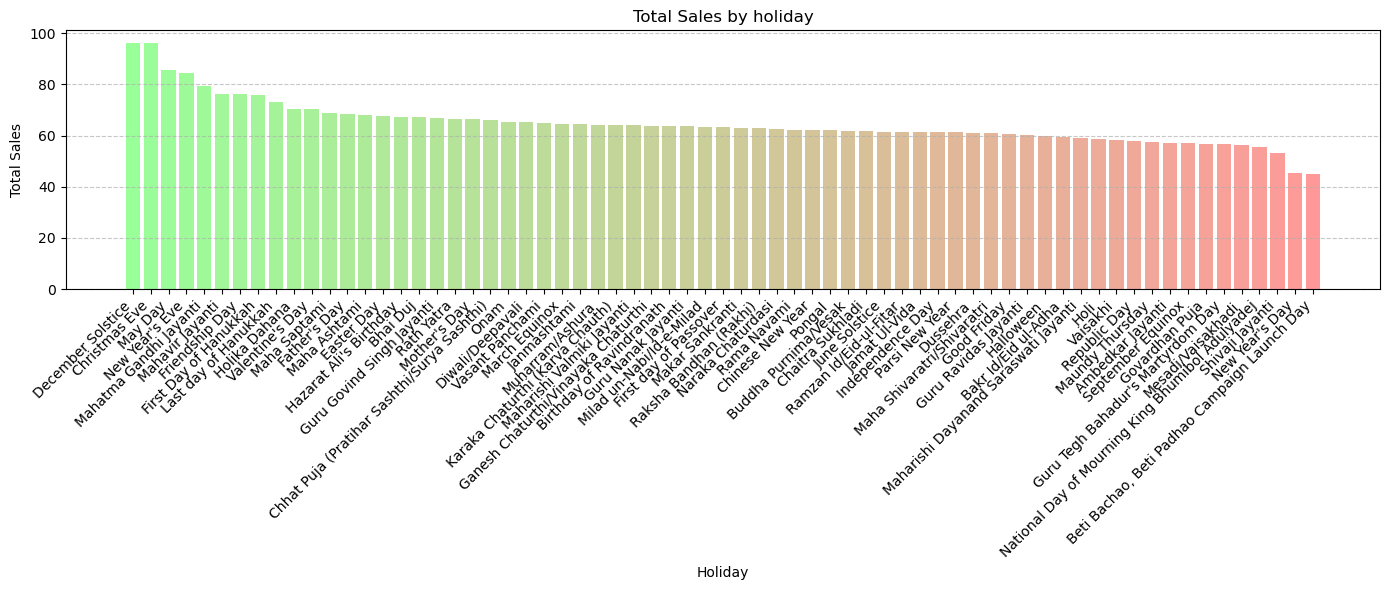

In [10]:
import matplotlib.pyplot as plt
import numpy as np

total_sales_per_holiday = df.groupby('description')['total_sales'].mean()
total_sales_per_holiday = total_sales_per_holiday.sort_values(ascending=False)

# Assuming total_sales_per_holiday is already calculated as described in the question
# Generate a colormap ranging from green to red based on bar index
num_bars = len(total_sales_per_holiday)
pastel_red = (1, 0.6, 0.6)  # RGB values for pastel red
pastel_green = (0.6, 1, 0.6)  # RGB values for pastel green
colors = np.linspace(pastel_green, pastel_red, num_bars)

# Plot the bar chart with the generated colormap
plt.figure(figsize=(14, 6))
bars = plt.bar(total_sales_per_holiday.index, total_sales_per_holiday.values, color=colors)

plt.title('Total Sales by holiday')
plt.xlabel('Holiday')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()
plt.show()